In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 1000
import scipy.stats as stats
import math


In [16]:
ozoneData2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/ozone_ny_data_2020.csv")
ozoneData2020.head()


Unnamed: 0  state_code  county_code  site_number  parameter_code  poc  \
0           0          36           45            2           44201    1   
1           1          36           45            2           44201    1   
2           2          36           45            2           44201    1   
3           3          36           45            2           44201    1   
4           4          36           45            2           44201    1   

   latitude  longitude  datum parameter  ... method_code  \
0  44.08747  -75.97316  WGS84     Ozone  ...          87   
1  44.08747  -75.97316  WGS84     Ozone  ...          87   
2  44.08747  -75.97316  WGS84     Ozone  ...          87   
3  44.08747  -75.97316  WGS84     Ozone  ...          87   
4  44.08747  -75.97316  WGS84     Ozone  ...          87   

                                   method local_site_name  \
0  INSTRUMENTAL - ULTRA VIOLET ABSORPTION     PERCH RIVER   
1  INSTRUMENTAL - ULTRA VIOLET ABSORPTION     PERCH RIVER   
2  INSTRUMENTAL - ULTRA VIOLET ABSORPTION     PERCH RIVER   
3  INSTRUMENTAL - ULTRA VIOLET ABSORPTION     PERCH RIVER   
4  INSTRUMENTAL - ULTRA VIOLET ABSORPTION     PERCH RIVER   

              site_address     state     county           city cbsa_code  \
0  VAADI ROAD, PERCH RIVER  New York  Jefferson  Not in a city   48060.0   
1  VAADI ROAD, PERCH RIVER  New York  Jefferson  Not in a city   48060.0   
2  VAADI ROAD, PERCH RIVER  New York  Jefferson  Not in a city   48060.0   
3  VAADI ROAD, PERCH RIVER  New York  Jefferson  Not in a city   48060.0   
4  VAADI ROAD, PERCH RIVER  New York  Jefferson  Not in a city   48060.0   

                      cbsa  date_of_last_change  
0  Watertown-Fort Drum, NY           12/31/2020  
1  Watertown-Fort Drum, NY           12/31/2020  
2  Watertown-Fort Drum, NY           12/31/2020  
3  Watertown-Fort Drum, NY           12/31/2020  
4  Watertown-Fort Drum, NY           12/31/2020  

[5 rows x 32 columns]

In [17]:
missingValueCount=ozoneData2020.isnull().sum()
print(missingValueCount)

Unnamed: 0                0
state_code                0
county_code               0
site_number               0
parameter_code            0
poc                       0
latitude                  0
longitude                 0
datum                     0
parameter                 0
sample_duration           0
pollutant_standard        0
date_local                0
units_of_measure          0
event_type                0
observation_count         0
observation_percent       0
validity_indicator        0
arithmetic_mean           0
first_max_value           0
first_max_hour            0
aqi                    9221
method_code               0
method                    0
local_site_name           0
site_address              0
state                     0
county                    0
city                      0
cbsa_code              5027
cbsa                   5027
date_of_last_change       0
dtype: int64


In [18]:
ozoneData2020.shape
print(ozoneData2020.dtypes)
print(ozoneData2020['method_code'].unique())
print(ozoneData2020['pollutant_standard'].unique())
grouped=ozoneData2020.groupby(['pollutant_standard'])
print(grouped['pollutant_standard'].count())
print(ozoneData2020['sample_duration'].unique())
print(ozoneData2020['units_of_measure'].unique())
print(ozoneData2020['event_type'].unique())
print(ozoneData2020['event_type'].unique())
print(ozoneData2020['event_type'].unique())
list(ozoneData2020.columns) 

[87 47]
['Ozone 8-hour 2015' 'Ozone 1-hour 1979' 'Ozone 8-Hour 2008'
 'Ozone 8-Hour 1997']
pollutant_standard
Ozone 1-hour 1979    9221
Ozone 8-Hour 1997    9206
Ozone 8-Hour 2008    9206
Ozone 8-hour 2015    9181
Name: pollutant_standard, dtype: int64


In [19]:


ozoneData2020New=ozoneData2020[['date_local','county_code','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi',
                                'local_site_name','state']].copy()

ozoneData2020New = ozoneData2020New[ozoneData2020New['pollutant_standard'] == "Ozone 8-hour 2015"] 
print(ozoneData2020New.shape)

#----begin converting date_local column type from object to datetime64-------

# #ozoneData2020New['date_local']=pd.to_datetime(ozoneData2020New['date_local'])
# print(ozoneData2020New.dtypes)
# #ozoneData2020New.index=ozoneData2020New['date_local']
# #del ozoneData2020New['date_local']

# did not convert date beacuse matplotlib is giving error while plotting for  datetime64

#-----end converting date_local column type from object to datetime64
missingValueCount=ozoneData2020New.isnull().sum()
print(missingValueCount)

                               



(9181, 12)
date_local            0
county_code           0
site_number           0
parameter             0
sample_duration       0
pollutant_standard    0
validity_indicator    0
arithmetic_mean       0
first_max_value       0
aqi                   0
local_site_name       0
state                 0
dtype: int64


In [20]:
### count of different sites through out new york state###

grouped=ozoneData2020New.groupby(['site_number'])
print(grouped['site_number'].count())


site_number
2       1241
3        997
4        539
5        958
6        332
7        304
9        299
12       301
110      334
111      252
124      363
133      335
135      334
1006     334
1007     365
1015     331
2004     302
3001     303
5001     299
9991     658
Name: site_number, dtype: int64


In [21]:
print(ozoneData2020New['validity_indicator'].unique())
grouped=ozoneData2020New.groupby(['validity_indicator'])
print(grouped['validity_indicator'].count())

######Remove Invalid Values ######
ozoneData2020New = ozoneData2020New[ozoneData2020New['validity_indicator'] == "Y"] 
print(ozoneData2020New.shape)
ozoneData2020New.to_csv('E:/projects/CSE-587-Air-Quality-Prediction-Model/CleanedData/ozone_ny_data_2020.csv')




['Y' 'N']
validity_indicator
N     182
Y    8999
Name: validity_indicator, dtype: int64
(8999, 12)


In [14]:
### count of different sites through out new york state###




print(MeanMeasuredValue)
#grouped.hist()


# sigma = math.sqrt(variance)
# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# print(x)
# plt.plot(x, stats.norm.pdf(x, mu, sigma))
# plt.show()




date_local
1/1/2020     0.027988
1/10/2020    0.021299
1/11/2020    0.025643
1/12/2020    0.027627
1/13/2020    0.013371
               ...   
9/5/2020     0.028537
9/6/2020     0.031994
9/7/2020     0.028834
9/8/2020     0.025260
9/9/2020     0.025262
Name: arithmetic_mean, Length: 364, dtype: float64


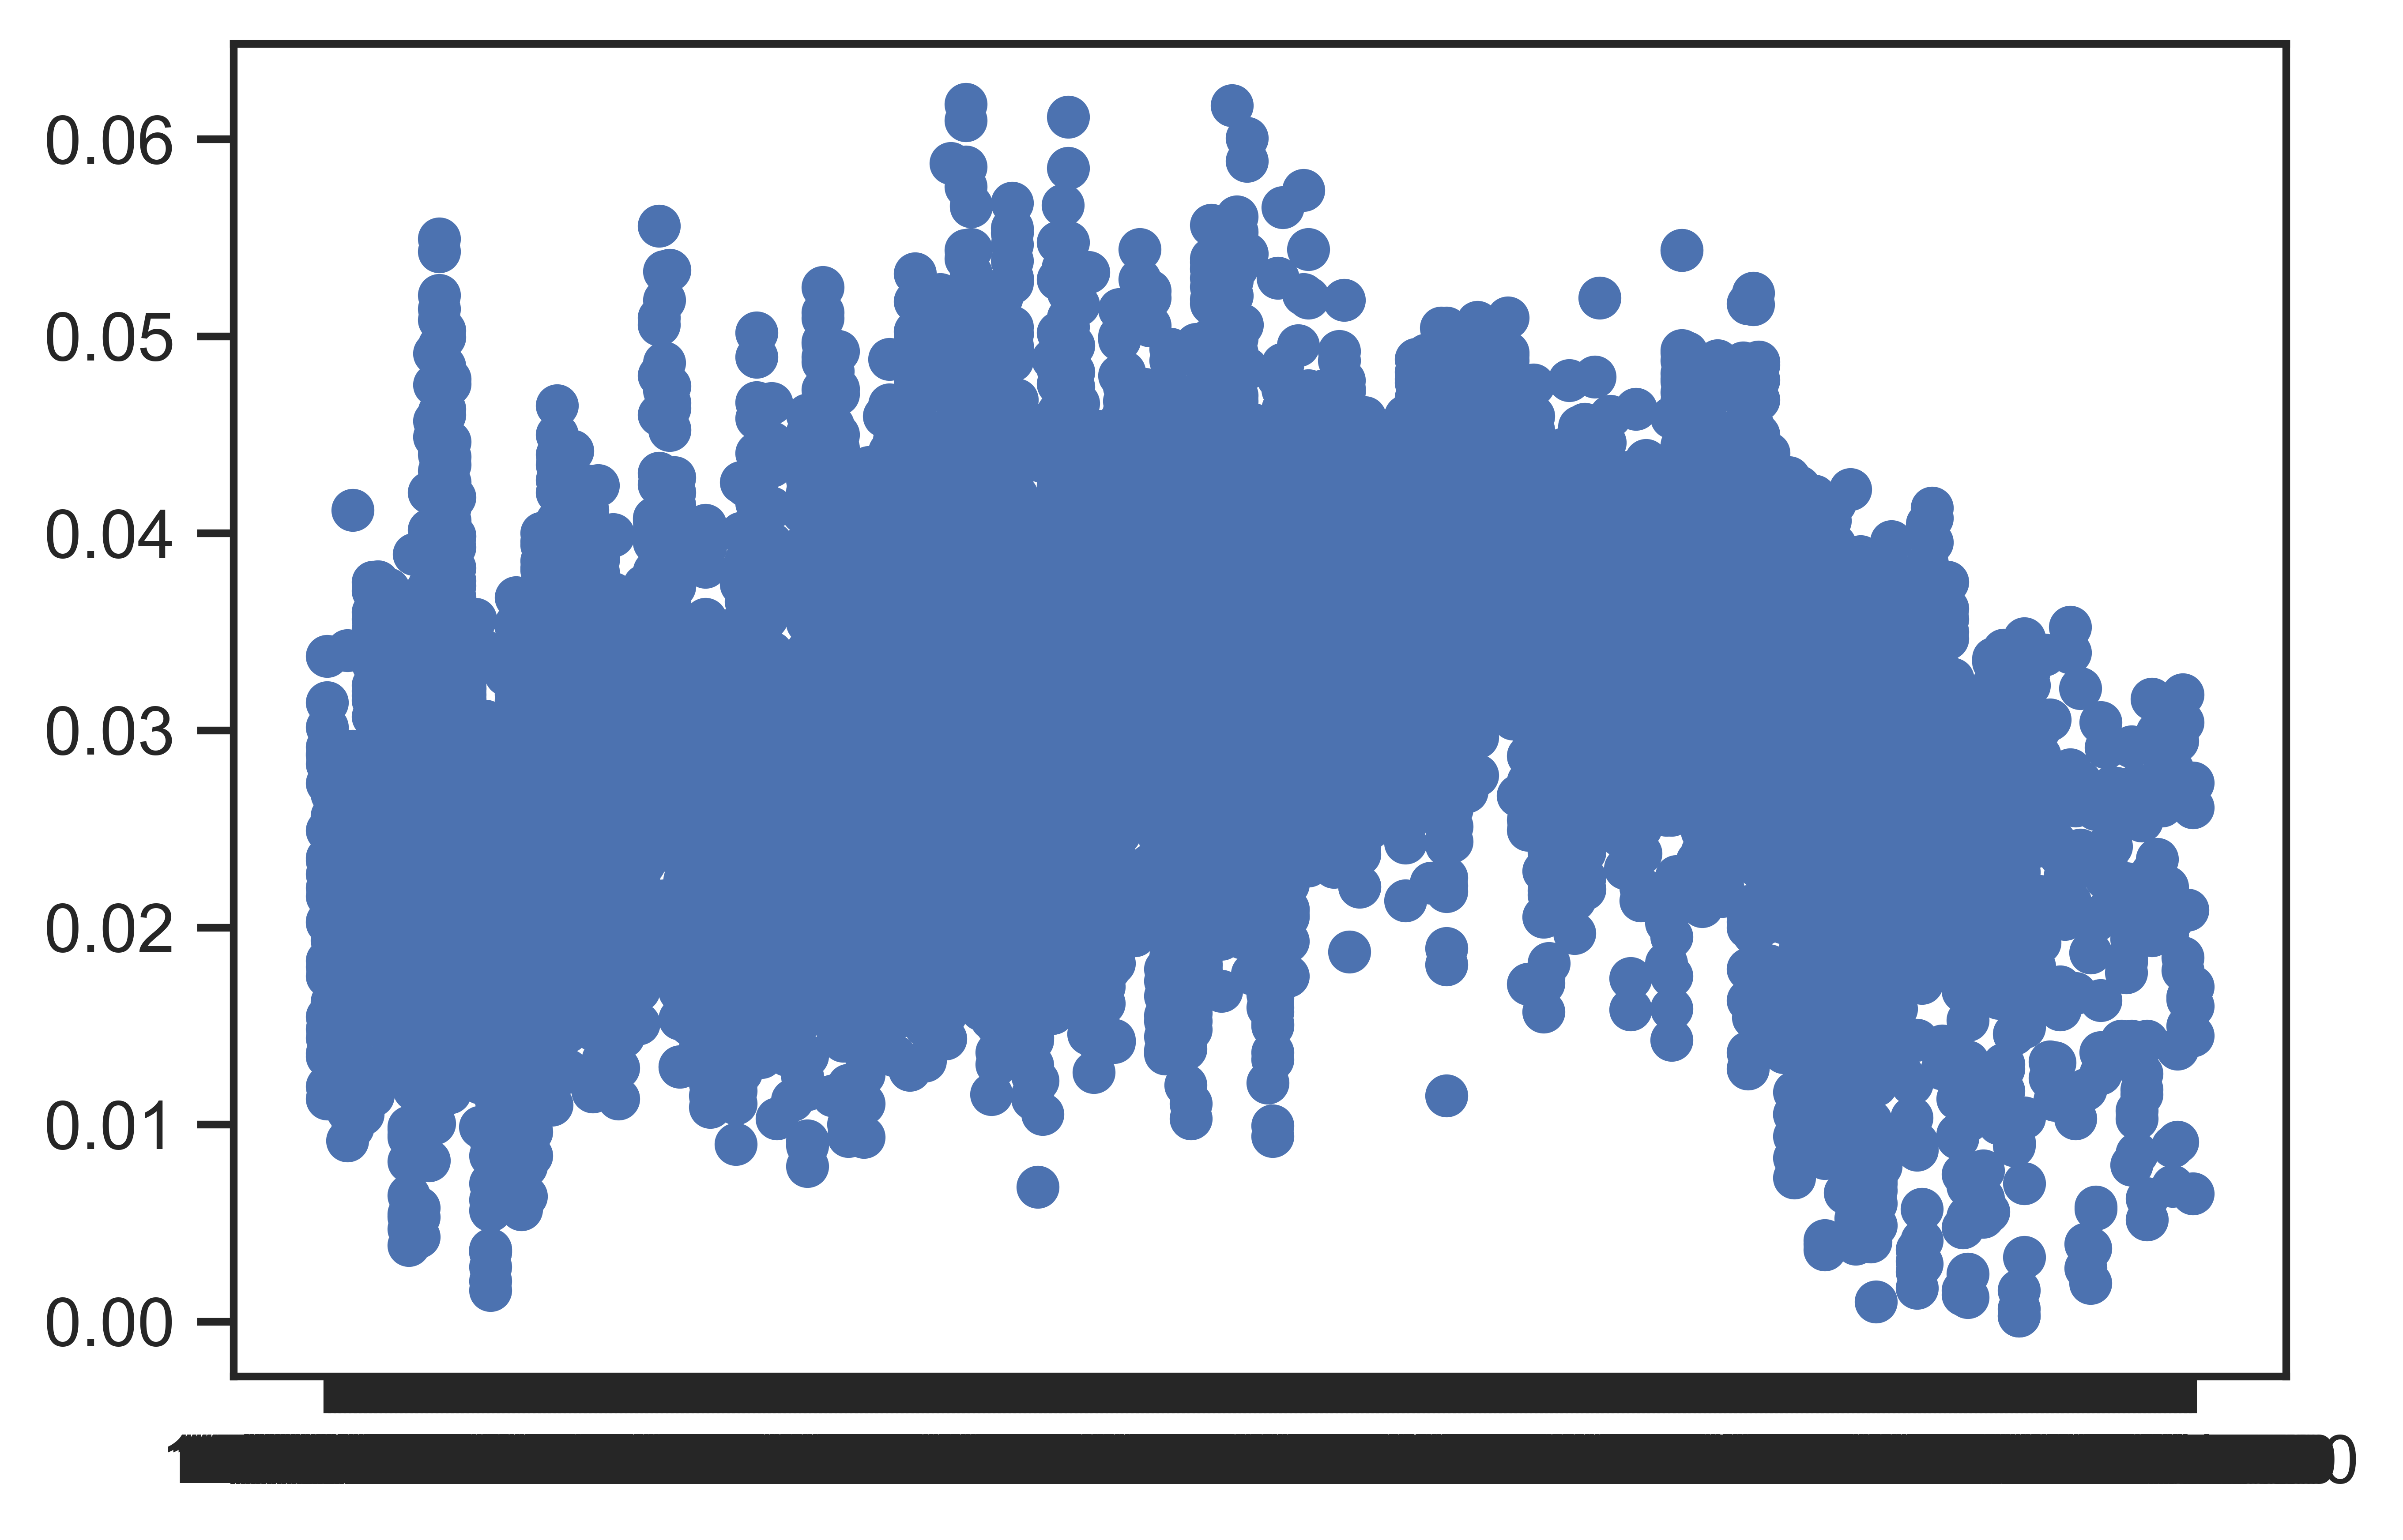

In [65]:
#group by date and average
plt.scatter(x=ozoneData2020New['date_local'], y=ozoneData2020New['arithmetic_mean'])

In [ ]:
sns.pairplot(df, hue="species")